# Acquiring dataset and importing all the essential libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split

In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/churn_data_st.csv')

# Show a preview of the dataset

In [5]:
df.head()

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No
2,3668-QPYBK,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No
4,9237-HQITU,Female,0,2,2,Month-to-month,Yes,70.70,151.65,Yes


# Feature Encoding

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
tenure                int64
ServiceCount          int64
Contract             object
PaperlessBilling     object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [7]:
df["gender"]=df["gender"].map({"Female":1,"Male":0})
df["Contract"]=df["Contract"].map({'Month-to-month':0, 'One year':1, 'Two year':2})
df["PaperlessBilling"]=df["PaperlessBilling"].map({"Yes":0,"No":1})

In [8]:
#select needed columns
cat_df=df[["gender","Contract","PaperlessBilling","Churn"]]
cat_df.head()

,gender,Contract,PaperlessBilling,Churn
0,1,0,0,No
1,0,1,1,No
2,0,0,0,Yes
3,0,1,1,No
4,1,0,0,Yes


# Applying Chi Squared test

In [9]:
#Independent variable
x=cat_df.iloc[:,:-1]
#Target variable
y=cat_df.iloc[:,-1]
#returns f score and p value
f_score=chi2(x,y)
f_score
p_value=pd.Series(f_score[1],index=x.columns)
p_value.sort_values(ascending=True)

Contract            1.227941e-244
PaperlessBilling     3.008474e-35
gender               6.076114e-01
dtype: float64

# Let’s understand the p_value with the help of visualization.

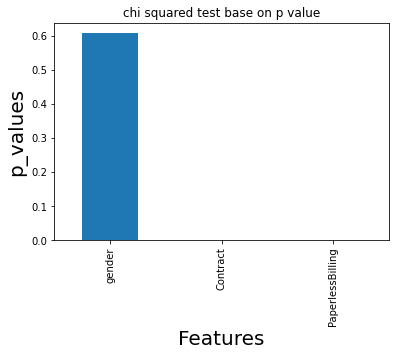

In [10]:
p_value.plot(kind="bar")
plt.xlabel("Features",fontsize=20)
plt.ylabel("p_values",fontsize=20)
plt.title("chi squared test base on p value")
plt.show()